In [1]:
# initiating gpu using tensorflow.
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.Session(config=config)
set_session(sess)

C:\Users\DELL\Dropbox\python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#importing libraries for the data processing and model.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from keras.models import load_model
%matplotlib inline

In [3]:
# defining the path and classes.
directory = "C:/Users/DELL/Documents/Python/deep learning/state-farm-distracted-driver-detection/imgs/train"
test_directory = "C:/Users/DELL/Documents/Python/deep learning/state-farm-distracted-driver-detection/imgs/test"
random_test = '../input/driver/'
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
classes_d = {'c0': 'safe driving',    'c1': 'texting - right',    'c2': 'talking on the phone - right',    'c3': 'texting - left',
            'c4': 'talking on the phone - left',    'c5': 'operating the radio',    'c6': 'drinking',    'c7': 'reaching behind',
             'c8': 'hair and makeup',    'c9': 'talking to passenger',}

In [4]:
# defining a shape to be used for our models.
img_size1 = 240
img_size2 = 240

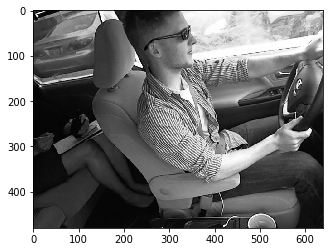

In [5]:
# Train class image for display.
for i in classes:
    path = os.path.join(directory,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

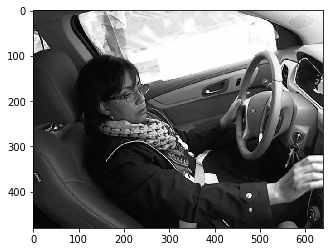

In [6]:
# Test class image for display.
test_array = []
for img in os.listdir(test_directory):
    img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_GRAYSCALE)
    test_array = img_array
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break

In [7]:
# checkking image size using shape.
print(img_array.shape)

(480, 640)


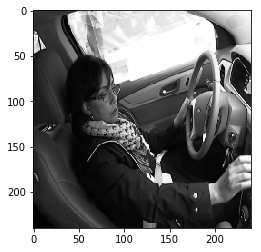

In [8]:
# trying out the resize image functionality
new_img = cv2.resize(test_array,(img_size2,img_size1))
plt.imshow(new_img,cmap='gray')
plt.show()

In [9]:
# creating a training dataset.
training_data = []
i = 0
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img_array,(img_size2,img_size1))
            training_data.append([
                new_img,class_num])

In [10]:
# Creating a test dataset.
testing_data = []
i = 0
def create_testing_data():        
    for img in os.listdir(test_directory):
        img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img_array,(img_size2,img_size1))
        testing_data.append([img,
            new_img])

In [11]:
create_training_data()

In [12]:
create_testing_data()

In [13]:
print(len(training_data))
print(len(testing_data))

22424
79726


In [14]:
random.shuffle(training_data)

In [15]:
x = []
y = []

In [16]:
for features, label in training_data:
    x.append(features)
    y.append(label)

In [17]:
x[0].shape

(240, 240)

In [18]:
len(x)

22424

In [19]:
X = np.array(x).reshape(-1,img_size2,img_size1,1)

X[0].shape

(240, 240, 1)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [21]:
Y_train = np_utils.to_categorical(y_train,num_classes=10)
Y_test = np_utils.to_categorical(y_test,num_classes=10)

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(240,240,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 238, 238, 32)      320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 238, 238, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 119, 119, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 119, 119, 64)      18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 119, 119, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 64)        0         
__________

In [25]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [26]:
callbacks = [EarlyStopping(monitor='val_acc',patience=5)]

In [27]:
batch_size = 50
n_epochs = 20

In [28]:
results = model.fit(x_train,Y_train,batch_size=batch_size,epochs=n_epochs,verbose=1,validation_data=(x_test,Y_test),callbacks=callbacks)

Train on 15696 samples, validate on 6728 samples
Epoch 1/20
14950/15696 [===========================>..] - ETA: 5:32 - loss: 0.9328 - acc: 0.7038

KeyboardInterrupt: 

In [ ]:
preds = model.predict(np.array(testing_data[0][1]).reshape(-1,img_size2,img_size1,1))

In [ ]:
# serialize model to JSON

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5

model.save_weights('./driverdistraction_lr_weights.h5', overwrite=True)

In [ ]:
model.save('./driverdistraction_lr_weights.h5')

In [ ]:
loaded_model = load_model('../input/driver-distraction/driverdistraction_lr_weights.h5')

In [ ]:
test_data = np.array(testing_data[6000][1]).reshape(-1,img_size2,img_size1,1)

In [ ]:
preds = loaded_model.predict(test_data)
preds

In [ ]:
print('Predicted: ',classes_d[classes[pd.to_numeric(format(np.argmax(preds)))]])
new_img = cv2.resize(testing_data[6000][1],(img_size2,img_size1))
plt.imshow(new_img,cmap='gray')
plt.show()